In [46]:
import h5py
import numpy
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
path = "data/fintech.h5"
f = h5py.File(path, "r")
CLAIM_ACCT = f['CLAIM_ACCT_FIN']

### 三種角色的重複比例

In [16]:
#檢查Injured_RK與Policy_Holder_RK的關係
#index:0 Injured_RK, index:9 Insured_RK, index:10 Policy_holder_RK
RK_same = 0
RK_diff = 0

for i in range(1,CLAIM_ACCT.shape[0]):
    if CLAIM_ACCT[i][9] == CLAIM_ACCT[i][10]:
        RK_same += 1
    else:
        RK_diff += 1
print("Same ratio", round(RK_same/(CLAIM_ACCT.shape[0]-1),2))
print("Diff ratio", round(RK_diff/(CLAIM_ACCT.shape[0]-1),2))

Same ratio 0.73
Diff ratio 0.27


In [21]:
col = ['事故人', '被保人', '要保人']
row = ['事故人', '被保人', '要保人']
data = [[None, 98, 72],[None, None, 73],[None,None,None]]
df = pd.DataFrame(data, index=row, columns =col)
df

##結論, 把被保人跟事故人取交集, 併成同一col

,事故人,被保人,要保人
事故人,None,98.0,72.0
被保人,None,NaN,73.0
要保人,None,NaN,NaN


### 理賠案件類型

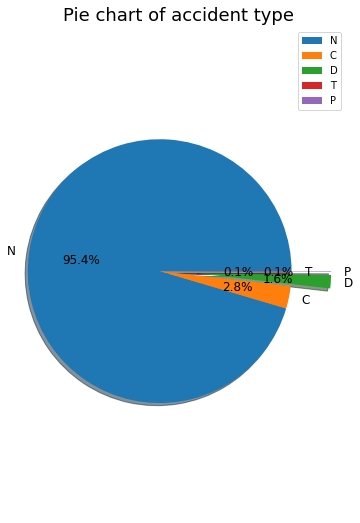

In [61]:
bundle_dict = defaultdict(int)
for i in range(1,CLAIM_ACCT.shape[0]):
    ill_type = CLAIM_ACCT[i][3][2]
    bundle_dict[ill_type] += 1

#plot
plt.figure(figsize=(6,9))    

labels = ['N', 'C', 'D', 'T', 'P']  #['疾病醫療', '重大疾病', '身故給付', '完全失能', '部份失能'] 
separeted = (0, 0, 0.3, 0, 0.3)                  
bundle_data = [bundle_dict['N'],bundle_dict['C'],bundle_dict['D'],bundle_dict['T'],bundle_dict['P']]                         # 製作圓餅圖的數值來源

plt.pie(bundle_data,                           
        labels = labels,            
        autopct = "%1.1f%%",            
        explode = separeted,            
        pctdistance = 0.6,              
        textprops = {"fontsize" : 12},  
        shadow=True)                    
 
plt.axis('equal')                                          
plt.title("Pie chart of accident type", {"fontsize" : 18})  
plt.legend(loc = "best")

#結論：其實這個col並沒有太大意義

### 一個人（可能是3type 其中之一）擁有多張保單的比例

In [75]:
person_index_list = [0,9,10]
duplicate_list = []
for person_index in person_index_list:
    Policy_dict = defaultdict(int)
    num_people = 0
    num_duplicate = 0
    for i in range(1,CLAIM_ACCT.shape[0]):
        if Policy_dict[CLAIM_ACCT[i][person_index]] == 0: #紀錄人
            num_people += 1
            Policy_dict[CLAIM_ACCT[i][person_index]] = CLAIM_ACCT[i][2] #policy_rk
        elif Policy_dict[CLAIM_ACCT[i][person_index]] == -1: #已經確認有重複的
            continue
        else:
            if Policy_dict[CLAIM_ACCT[i][person_index]] == CLAIM_ACCT[i][2]: #同一個號碼
                continue
            else:
                Policy_dict[CLAIM_ACCT[i][person_index]] = -1 #標記重複
                num_duplicate += 1
    duplicate_list.append(round(num_duplicate/num_people,2))

#結論：由於重複保單破10%, 並不是少數, 原本他們建議我們可以用自己的方式去merge同一個RK的人
#但我認為不需要做這件事情, 第一是我們把每一個資料當做獨立的就好, 另外是在那麼多資料重複底下, 並不適合做merge

In [73]:
col = ['事故人', '被保人', '要保人']
row = ['重複保單比例']
data = [duplicate_list]
df = pd.DataFrame(data, index=row, columns =col)
df

,事故人,被保人,要保人
重複保單比例,0.11,0.11,0.12
